In [34]:
    library(alr3)
    library(model) 

## Ejercicio F:

### Ejercicio F.1

In [2]:
X_1 <- c(17, 19, 19, 20, 20, 20, 20, 21, 21, 21 ,21, 25, 25, 27, 28, 30, 30)
X_2 <- c(42, 45, 45, 29, 29, 29, 29, 93, 93, 93, 93, 34, 34, 98, 9, 73, 73)
Y <- c(90, 71, 76, 63, 63, 80, 80, 80, 64, 82, 66, 75, 82, 99, 73, 67, 74)
data_F <- data.frame(X_1, X_2, Y)
data_F

X_1,X_2,Y
<dbl>,<dbl>,<dbl>
17,42,90
19,45,71
19,45,76
20,29,63
20,29,63
20,29,80
20,29,80
21,93,80
21,93,64


In [3]:
regresion_F.1 <- lm(Y ~ X_1+X_2, data_F)
summary(regresion_F.1)


Call:
lm(formula = Y ~ X_1 + X_2, data = data_F)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3764  -9.6597   0.3827   5.7693  21.2085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  72.2462    14.9067   4.847 0.000259 ***
X_1           0.0286     0.6455   0.044 0.965279    
X_2           0.0487     0.0876   0.556 0.586984    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.38 on 14 degrees of freedom
Multiple R-squared:  0.02267,	Adjusted R-squared:  -0.1169 
F-statistic: 0.1624 on 2 and 14 DF,  p-value: 0.8517


Este modelo ta re weno xd.

In [15]:
coef(`regresion_F.1`)

(Intercept)         X_1         X_2 
72.24619969  0.02860489  0.04870386

### Ejercicio F.2

In [75]:
pureErrorAnova(`regresion_F.1`)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X_1,1,1.688471,1.688471,0.02489147,0.8781208
X_2,1,33.323438,33.323438,0.49125462,0.5010860
Residuals,14,1509.105738,107.793267,NA,NA
Lack of fit,5,898.605738,179.721148,2.64945181,0.0967553
Pure Error,9,610.500000,67.833333,NA,NA


In [76]:
qf(0.90,5,9)

[1] 2.610613

Primero veamos que el test de error puro tiene 3 formas equivalentes de presentar sus hipotesis

H_{0}: La relación es lineal

vs

H_{1}: La relación no es lineal

Si solo si

H_{0}: No hay falta de ajuste

vs

H_{1}: Hay falta de ajuste

Si solo si

H_{0}: E[Y_{i}]= \beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2} + \epsilon

vs

H_{1}: E[Y_{i}] \neq \beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}  + \epsilon


Queremos estudiar la falta de ajuste utilizando error puro. Teniendo un valor p=0.0968 tenemos que rechazaremos H_{0} en favor de H_{1} si tomamos una significancia del 10% pero si tomamos una significancia del 5% tenemos que no rechazaremos H_{0}. Tomaremos una significancia del 5% con lo que no rechazamos H_{0}

### Ejecicio F.3

In [24]:
data_F$fitted.F.1 <- fitted( regresion_F.1 ) # valores ajustados
data_F$residuals.F.1 <- residuals( regresion_F.1 ) # residuos
data_F$rstudent.F.1 <- rstudent( regresion_F.1 )
data_F

X_1,X_2,Y,rstudent.regresion_F.1,rstudent.F.1,fitted.F.1,residuals.F.1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,42,90,1.73192335,1.73192335,74.77804,15.2219553
19,45,71,-0.39417239,-0.39417239,74.98137,-3.9813661
19,45,76,0.10029061,0.10029061,74.98137,1.0186339
20,29,63,-1.17089341,-1.17089341,74.23071,-11.2307093
20,29,63,-1.17089341,-1.17089341,74.23071,-11.2307093
20,29,80,0.57942563,0.57942563,74.23071,5.7692907
20,29,80,0.57942563,0.57942563,74.23071,5.7692907
21,93,80,0.26940420,0.26940420,77.37636,2.6236391
21,93,64,-1.48071900,-1.48071900,77.37636,-13.3763609


In [40]:
shapiro.test( data_F$residuals.F.1 )


	Shapiro-Wilk normality test

data:  data_F$residuals.F.1
W = 0.94367, p-value = 0.3644


In [41]:
shapiro.test( data_F$rstudent.F.1 )


	Shapiro-Wilk normality test

data:  data_F$rstudent.F.1
W = 0.92152, p-value = 0.1567


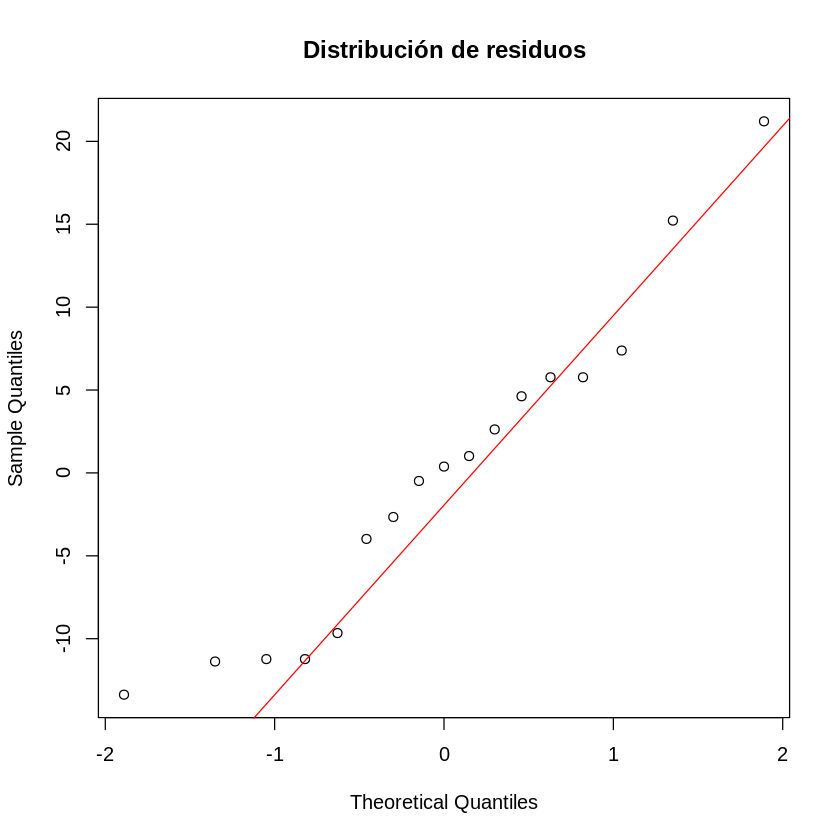

In [42]:
a<-qqnorm(data_F$residuals.F.1, 
       main = "Distribución de residuos")
qqline(data_F$residuals.F.1, col = 2)

Graficamente se aprecia que los residuos no ajustan perfectamente a una normal, pero son similares, según el valor p del test de shapiro-wilk no podemos rechazar H_{0}.

H_{0}:Los residuos distribuyen normal.

### Ejercicio F.4

In [43]:
summary(regresion_F.1)


Call:
lm(formula = Y ~ X_1 + X_2, data = data_F)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3764  -9.6597   0.3827   5.7693  21.2085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  72.2462    14.9067   4.847 0.000259 ***
X_1           0.0286     0.6455   0.044 0.965279    
X_2           0.0487     0.0876   0.556 0.586984    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.38 on 14 degrees of freedom
Multiple R-squared:  0.02267,	Adjusted R-squared:  -0.1169 
F-statistic: 0.1624 on 2 and 14 DF,  p-value: 0.8517


Podemos observar que las pruebas t parciales nos dicen que el aporte de X_{1} y X_{2} son despreciables, especialmente X_{1}, por lo demás el ajuste del modelo es bastante malo, pues tenemos que R^{2}=0.0227.

## Ejercicio K:

In [5]:
F.aov <- aov(Y ~ X_1+X_2,data_F)
summary(F.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
X_1          1    1.7    1.69   0.016  0.902
X_2          1   33.3   33.32   0.309  0.587
Residuals   14 1509.1  107.79               

El modelo queda Y= 72.2462+0.0286*X_1+0.0487*X_2

In [6]:
I=diag(1,nrow=3)
C<-matrix(c(5,0,0,0,4,2,0,2,2), nrow = 3)
solve(C,I)

0.2,0.0,0.0
0.0,0.5,-0.5
0.0,-0.5,1.0


In [7]:
J=diag(1,nrow=3)
C2<- matrix(c(4.25,0,0,0,4,2,0,2,2),nrow=3)
solve(C2,J)

0.2352941,0.0,0.0
0.0000000,0.5,-0.5
0.0000000,-0.5,1.0


## Ejercicio Z:

### Ejercicio Z.1

In [8]:
X_Z <- c(0,1,2,3,4,5,6,7,8,0,2,4,6,8,10,0,3,6,9)
X_2Z <-X_Z **2
Y_Z <- c(22.1,24.5,26.0,26.8,28.2,28.9,30.0,30.4,31.4,21.9,26.1,28.5,30.3,31.5,33.1,22.8,27.3,29.8,31.8)
data_Z <- data.frame(X_Z,X_2Z,Y_Z)
data_Z

X_Z,X_2Z,Y_Z
<dbl>,<dbl>,<dbl>
0,0,22.1
1,1,24.5
2,4,26.0
3,9,26.8
4,16,28.2
5,25,28.9
6,36,30.0
7,49,30.4
8,64,31.4


In [9]:
regresion_Z.1 <- lm(Y_Z ~ X_Z+X_2Z, data_Z)
summary(regresion_Z.1)


Call:
lm(formula = Y_Z ~ X_Z + X_2Z, data = data_Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66123 -0.28558 -0.05606  0.34252  0.65440 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.56123    0.19843 113.698  < 2e-16 ***
X_Z          1.66802    0.09895  16.857 1.31e-11 ***
X_2Z        -0.06796    0.01031  -6.591 6.21e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3942 on 16 degrees of freedom
Multiple R-squared:  0.9878,	Adjusted R-squared:  0.9863 
F-statistic: 649.9 on 2 and 16 DF,  p-value: 4.782e-16


In [10]:
anova(regresion_Z.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X_Z,1,195.242888,195.2428882,1256.28852,1.235421e-16
X_2Z,1,6.751565,6.7515651,43.44288,6.206331e-06
Residuals,16,2.486599,0.1554125,NA,NA


In [11]:
aov(regresion_Z.1)
summary(aov(regresion_Z.1))

Call:
   aov(formula = regresion_Z.1)

Terms:
                      X_Z      X_2Z Residuals
Sum of Squares  195.24289   6.75157   2.48660
Deg. of Freedom         1         1        16

Residual standard error: 0.3942239
Estimated effects may be unbalanced

            Df Sum Sq Mean Sq F value   Pr(>F)    
X_Z          1 195.24  195.24 1256.29  < 2e-16 ***
X_2Z         1   6.75    6.75   43.44 6.21e-06 ***
Residuals   16   2.49    0.16                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Ejercicio z.2

In [65]:
summary(regresion_Z.1)


Call:
lm(formula = Y_Z ~ X_Z + X_2Z, data = data_Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66123 -0.28558 -0.05606  0.34252  0.65440 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.56123    0.19843 113.698  < 2e-16 ***
X_Z          1.66802    0.09895  16.857 1.31e-11 ***
X_2Z        -0.06796    0.01031  -6.591 6.21e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3942 on 16 degrees of freedom
Multiple R-squared:  0.9878,	Adjusted R-squared:  0.9863 
F-statistic: 649.9 on 2 and 16 DF,  p-value: 4.782e-16


Tenemos que el valor p del estadistico F sobre el modelo en general es 4.782e-16 con lo que con un 5% de significancia rechazamos H_{0} en favor de H_{1}.

H_{0}= todos los betas=0

vs

H_{1}=algún beta distinto de 0 #copiar esto en latex distintoa como esta escrito.

### Ejercicio z.3

In [67]:
pureErrorAnova(`regresion_Z.1`)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X_Z,1,195.2428882,195.24288822,2073.375804,5.977021e-11
X_2Z,1,6.7515651,6.75156506,71.698036,2.895051e-05
Residuals,16,2.4865994,0.15541246,NA,NA
Lack of fit,8,1.7332660,0.21665825,2.300796,1.299026e-01
Pure Error,8,0.7533333,0.09416667,NA,NA


In [77]:
qf(0.95,8,8)

[1] 3.438101

Recordemos que el test de error puro o tambien llamado falta de ajuste tiene 3 formas equivalentes de presentar sus hipotesis:

H_{0}: La relación es lineal

vs

H_{1}: La relación no es lineal

Si solo si

H_{0}: No hay falta de ajuste

vs

H_{1}: Hay falta de ajuste

Si solo si

H_{0}: E[Y_{i}]= \beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2} + \epsilon

vs

H_{1}: E[Y_{i}] \neq \beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}  + \epsilon

Tenemos un valor p=0.1299 por lo que tomando una significancia del 5% al 10% no rechazaremos H_{0}.

### Ejercicio z.4

In [13]:
regresion_Z.4 <- lm(Y_Z ~ X_Z, data_Z)
summary(regresion_Z.4)


Call:
lm(formula = Y_Z ~ X_Z, data = data_Z)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4464 -0.4282  0.1809  0.6127  0.9718 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.34638    0.29675   78.67  < 2e-16 ***
X_Z          1.04546    0.05516   18.95 7.18e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7372 on 17 degrees of freedom
Multiple R-squared:  0.9548,	Adjusted R-squared:  0.9522 
F-statistic: 359.3 on 1 and 17 DF,  p-value: 7.182e-13


In [14]:
anova(regresion_Z.4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X_Z,1,195.242888,195.2428882,359.2845,7.181631e-13
Residuals,17,9.238164,0.5434214,NA,NA


Pareciera ser suficiente, el cambio en la suma cuadrada de residuos es en 6.7516, la variació en el R^2 es del 3.30% lo que no es mucho consierando que el modelo sólo con X explica el 95.48% de la variabilidad de los datos, es decir tiene un R^2=95.48%. #Recomiendo continuar luego de ver las clases para saber si quieren que estudie normalidad de residuos

### Ejercicio z.5

El modelo cuadratico es una mejora respecto al modelo lineal, aunque siempre se sabe eso pues a mayor regresoras mayor ajuste, la prueba t parcial y la prueba f parcial indican que la regresora X^2 es significativa para el modelo, por lo que es una buena adición a este.